In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
len(y)

1797

In [12]:
import matplotlib.pyplot as plt

#for j in range(100):
 #   print(digits.target[j])

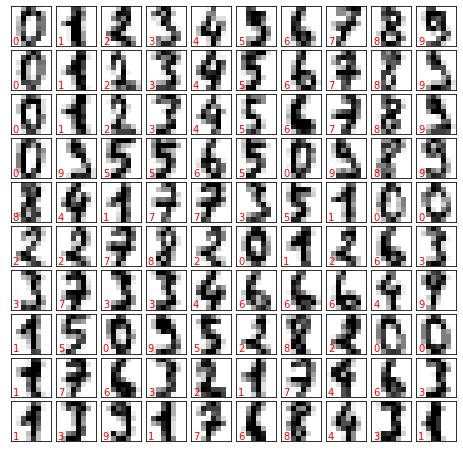

In [27]:

fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='red')

In [15]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

C:\Users\venka\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\venka\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

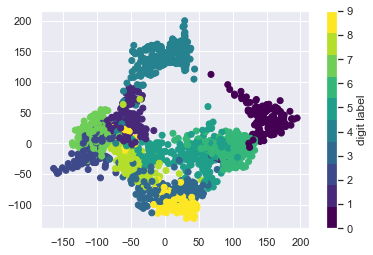

In [47]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            alpha=1, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=32)


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8244444444444444

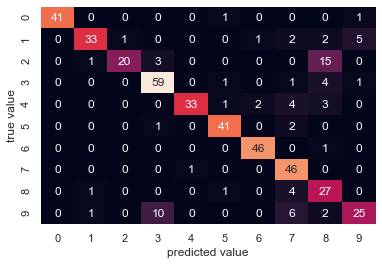

In [46]:
import seaborn as sns
sns.set
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [49]:
len(ytest)

450

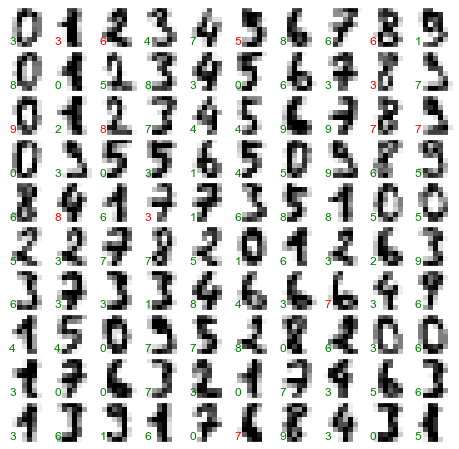

In [52]:
fig, axes =  plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')